<a href="https://colab.research.google.com/github/andrewbilbrey/Billboard-Song-Data-Assignment-6-/blob/master/BilbreyAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	What is your issue of interest?
Billboard top 100 songs and their musical qualities.

2.	Why is this issue important? 
Knowing the "DNA" of songs in the billboard top 100 is beneficial to artists, educators, and producers. This dataset can provide hints/generalizations about american popular music. I.E. what makes a song popular.


3.	What questions do you try to answer? 
Which genres are the most well represented? Who are the top 10 artists? What are the most used tempos. 
Analyze the music's loudness, energy, valence, and danceability to search for trends. Statistical overview of these qualities.


4.	Where do you get the data?
https://data.world/typhon/billboard-hot-100-songs-2000-2018-w-spotify-data-lyrics



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load, Preview, and Clean the dataset

In [4]:
df = pd.read_csv('billboardandspotifydata.csv')
df.head()

,year,title,simple_title,artist,peak_pos,last_pos,weeks,rank,change,genre,broad_genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,NaN,4th Dimension,NaN,Kanye West and Kid Cudi,42,0,1,42,New,[u'rap'],NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,NaN,All Girls Are The Same,NaN,Juice WRLD,41,49,5,41,8,[u'rap'],NaN,0.529,0.0856,161.989,0.307,0.0769,0.000335,4,0.671,0,165820,-7.226,0.203,1
2,NaN,All Mine,NaN,Kanye West,11,11,2,31,-20,"[u'pop rap', u'rap']",NaN,0.308,0.0933,122.099,0.338,0.125,0,4,0.925,11,145507,-6.562,0.265,0
3,NaN,Alone,NaN,Halsey Featuring Big Sean & Stefflon Don,70,73,9,74,-1,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,NaN,Babe,NaN,Sugarland Featuring Taylor Swift,72,0,2,95,Re-Entry,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [5]:
df0 = df.dropna(inplace=False)
df1 = df0[df0  != "unknown"]
df2 = df1.drop(columns=['simple_title','genre','peak_pos','last_pos','weeks','rank','change',])
df2[["speechiness", "acousticness","instrumentalness","time_signature","danceability","key","duration_ms","loudness","valence","mode", "energy", "liveness", "tempo"]] = df2[["speechiness", "acousticness","instrumentalness","time_signature","danceability","key","duration_ms","loudness","valence","mode", "energy", "liveness", "tempo"]].apply(pd.to_numeric)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Examine The Data

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7206 entries, 367 to 7572
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              7206 non-null   float64
 1   title             7206 non-null   object 
 2   artist            7206 non-null   object 
 3   broad_genre       6771 non-null   object 
 4   energy            7115 non-null   float64
 5   liveness          7115 non-null   float64
 6   tempo             7115 non-null   float64
 7   speechiness       7115 non-null   float64
 8   acousticness      7115 non-null   float64
 9   instrumentalness  7115 non-null   float64
 10  time_signature    7115 non-null   float64
 11  danceability      7115 non-null   float64
 12  key               7115 non-null   float64
 13  duration_ms       7115 non-null   float64
 14  loudness          7115 non-null   float64
 15  valence           7115 non-null   float64
 16  mode              7115 non-null   float6

# Top Genres

In [7]:
df2['broad_genre'].value_counts()

rap        1779
r&b        1387
country    1259
pop        1259
rock        839
edm         248
Name: broad_genre, dtype: int64

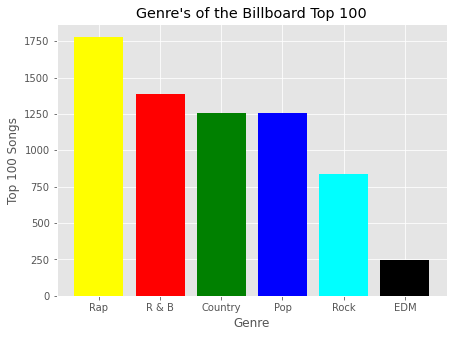

In [8]:
plt.style.use('ggplot')

genre = ['Rap', 'R & B', 'Country', 'Pop', 'Rock', 'EDM']
appear = [1779, 1387, 1259, 1259, 839, 248]

x_pos = [i for i, _ in enumerate(genre)]

fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(x_pos, appear, color=['yellow', 'red', 'green', 'blue', 'cyan', 'black'])
plt.xlabel("Genre")
plt.ylabel("Top 100 Songs")
plt.title("Genre's of the Billboard Top 100")

plt.xticks(x_pos, genre)

plt.show()

# Top Artists

In [9]:
df2['artist'].value_counts().head(10)

glee cast        206
drake            109
taylor swift      75
justin bieber     55
kenny chesney     49
chris brown       48
beyonce           48
eminem            44
rihanna           44
lil wayne         44
Name: artist, dtype: int64

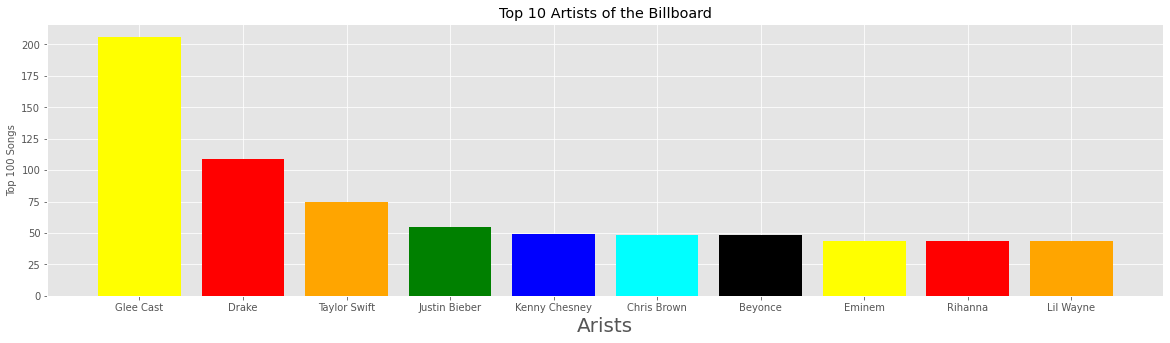

In [12]:
artist = ['Glee Cast', 'Drake', 'Taylor Swift', 'Justin Bieber', 'Kenny Chesney', 'Chris Brown', 'Beyonce', 'Eminem', 'Rihanna', 'Lil Wayne']
appear1 = [206, 109, 75, 55, 49, 48, 48, 44, 44, 44]

x1_pos = [i for i, _ in enumerate(artist)]

fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x1_pos, appear1, color=['yellow', 'red', 'orange', 'green', 'blue', 'cyan','black'])
plt.xlabel("Arists", fontsize=20)
plt.ylabel("Top 100 Songs", fontsize=10)
plt.title("Top 10 Artists of the Billboard")

plt.xticks(x1_pos, artist)

plt.show()

# Spotify Data Statistical Analysis

In [13]:
df2.describe()

,year,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,7206.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000
mean,2009.350402,0.693869,0.186026,122.312745,0.103637,0.164987,0.013321,3.975264,0.625420,5.237245,232171.771469,-5.924883,0.520592,0.673507
std,5.131312,0.174659,0.143396,29.352425,0.104263,0.210436,0.089876,0.267131,0.147802,3.586231,44599.980723,2.337604,0.224292,0.468963
min,2000.000000,0.056500,0.016000,50.454000,0.022500,0.000001,0.000000,0.000000,0.113000,0.000000,37067.000000,-22.015000,0.033200,0.000000
25%,2005.000000,0.583000,0.094200,98.027000,0.035700,0.016800,0.000000,4.000000,0.526000,2.000000,205020.000000,-7.029500,0.343000,0.000000
50%,2009.000000,0.720000,0.129000,121.036000,0.054600,0.073200,0.000000,4.000000,0.628000,5.000000,227423.000000,-5.564000,0.520000,1.000000
75%,2014.000000,0.828000,0.242000,141.126000,0.129000,0.238000,0.000021,4.000000,0.729000,8.000000,253627.000000,-4.325500,0.696500,1.000000
max,2017.000000,0.996000,0.986000,217.682000,0.930000,0.995000,0.982000,5.000000,0.986000,11.000000,721580.000000,-0.320000,0.977000,1.000000


In [14]:
df2.var()

year                2.633036e+01
energy              3.050582e-02
liveness            2.056246e-02
tempo               8.615649e+02
speechiness         1.087070e-02
acousticness        4.428351e-02
instrumentalness    8.077702e-03
time_signature      7.135878e-02
danceability        2.184540e-02
key                 1.286105e+01
duration_ms         1.989158e+09
loudness            5.464394e+00
valence             5.030694e-02
mode                2.199263e-01
dtype: float64